# *dandelion* Notebook-4

![dandelion_logo](img/dandelion_logo.png)

***dandelion*** is primarily a single-cell BCR-seq analysis package but the initial part of the pre-processing can be applied to TCR-seq from 10X's VDJ output as well since both can be run through *igblastn* for reannotation. The output can then be transferred for analysis with other TCR focused tools like [scirpy](https://icbi-lab.github.io/scirpy/).


## Pre-processing - TCR

In [1]:
# import modules
import os
os.chdir(os.path.expanduser('/Users/kt16/Documents/Github/dandelion'))
import dandelion as ddl

/Users/kt16/miniconda3/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
# change directory to somewhere more workable
os.chdir(os.path.expanduser('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/Pan_Immune_TCR/'))
# print current working directory
os.getcwd()

'/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/Pan_Immune_TCR'

### Step 1:
#### Formatting the headers of the cellranger fasta file.
This step immediately below is optional and is just a lazy way to make a dictionary from an external file using a utility function `utl.dict_from_table`.

In [3]:
# prepare a dictionary from a meta data file.
sampledict = ddl.utl.dict_from_table('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/dandelion_files/meta/PIP_sampleInfo_kt16.txt', columns = ('SANGER SAMPLE ID', 'GEX_SAMPLE_ID')) # optional

In [4]:
# the first option is a list of fasta files to format and the second option is the prefix to add to each file.
sample = 'Pan_T7918887'
ddl.pp.format_fasta(sample+'/all_contig.fasta', sampledict[sample])

### Step 2:
#### Reannotate the V/D/J genes with *igblastn*.

`pp.reannotate_genes` uses [*changeo*](https://changeo.readthedocs.io/en/stable/examples/10x.html)'s scripts to call *igblastn* to reannotate the fasta files. I just need to specify `loci = 'tr'` and it should work. For the purpose of this notebook, I will be running it on the `filtered_contigs` file(s) but the `all_contigs` file(s) should work equally fine. Specifying `filtered = True` will pull the `filtered_contig.fasta` file.

In [5]:
# reannotate the vdj genes with igblastn and parses output to 'airr' (default) or 'changeo' tsv formats using changeo v1.0.0 scripts
ddl.pp.reannotate_genes(sample, loci='tr', filtered = True)

Assigning genes : 100%|██████████| 1/1 [00:28<00:00, 28.30s/it]


#### Quick check on how well the function worked
We can read in the original `filtered_contig_annotations.csv` and compare with the `igblastn` annotated files:

In [6]:
import pandas as pd
original = pd.read_csv(sample+'/filtered_contig_annotations.csv')
# adjust the index
original['index']=[sampledict[sample]+'_'+i for i in original['contig_id']]
original.set_index('index', inplace = True)
original

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
index,,,,,,,,,,,,,,,,,,
Pan_T7917815_AAACCTGAGGCCATAG-1_contig_1,AAACCTGAGGCCATAG-1,True,AAACCTGAGGCCATAG-1_contig_1,True,335,TRB,TRBV16,TRBD1,TRBJ2-3,TRBC2,False,None,None,None,1343,5,None,None
Pan_T7917815_AAACCTGAGTGTTGAA-1_contig_1,AAACCTGAGTGTTGAA-1,True,AAACCTGAGTGTTGAA-1_contig_1,True,492,TRB,TRBV29-1,TRBD1,TRBJ1-1,TRBC1,True,True,CSVDNRRQGGWAFF,TGCAGCGTTGACAATCGCCGACAGGGCGGTTGGGCTTTCTTT,4288,5,clonotype83,clonotype83_consensus_1
Pan_T7917815_AAACCTGGTCAGCTAT-1_contig_1,AAACCTGGTCAGCTAT-1,True,AAACCTGGTCAGCTAT-1_contig_1,True,823,TRB,TRBV30,TRBD1,TRBJ1-1,TRBC1,True,True,CAWSPGGGAEAFF,TGTGCCTGGAGTCCTGGGGGGGGGGCTGAAGCTTTCTTT,13700,22,clonotype30,clonotype30_consensus_2
Pan_T7917815_AAACCTGGTCAGCTAT-1_contig_2,AAACCTGGTCAGCTAT-1,True,AAACCTGGTCAGCTAT-1_contig_2,True,515,TRA,TRAV20,None,TRAJ10,TRAC,True,True,CAVQDAGGGNKLTF,TGTGCTGTGCAGGACGCGGGAGGAGGAAACAAACTCACCTTT,2800,2,clonotype30,clonotype30_consensus_1
Pan_T7917815_AAACGGGCAAGCTGAG-1_contig_1,AAACGGGCAAGCTGAG-1,True,AAACGGGCAAGCTGAG-1_contig_1,True,371,Multi,IGHV1-2,None,None,TRBC1,False,None,None,None,1747,2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pan_T7917815_TTTGGTTGTCATTAGC-1_contig_3,TTTGGTTGTCATTAGC-1,True,TTTGGTTGTCATTAGC-1_contig_3,True,333,Multi,IGHV1-2,None,None,TRBC1,False,None,None,None,1352,2,None,None
Pan_T7917815_TTTGGTTTCTTTACAC-1_contig_1,TTTGGTTTCTTTACAC-1,True,TTTGGTTTCTTTACAC-1_contig_1,True,567,TRA,TRAV6,None,TRAJ3,TRAC,True,False,CFISQPPSLQTQLPTSVPLGIIF,TGTTTCATATCACAGCCTCCCAGCCTGCAGACTCAGCTACCTACCT...,916,2,clonotype4,None
Pan_T7917815_TTTGGTTTCTTTACAC-1_contig_2,TTTGGTTTCTTTACAC-1,True,TTTGGTTTCTTTACAC-1_contig_2,True,500,TRB,TRBV6-4,None,TRBJ2-1,TRBC2,True,True,CASSDGDRNEQFF,TGTGCCAGCAGTGACGGGGATCGCAATGAGCAGTTCTTC,1072,4,clonotype4,clonotype4_consensus_1


And now for the newly annotated one:

In [7]:
new = pd.read_csv(sample+'/dandelion/data/filtered_contig_igblast_gap.tsv', sep = '\t', index_col=0)
new

,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,...,cdr3_end,np1,np1_length,np2,np2_length,junction_aa_length,cell_id,c_call,consensus_count,umi_count
sequence_id,,,,,,,,,,,,,,,,,,,,,
Pan_T7917815_ACATGGTGTGTGACCC-1_contig_1,TGGGGGACTCTGCTCTCTGTCCTGTCTCCTCATCTGCAAAATTAGG...,F,T,TRBV19*01,NaN,TRBJ2-1*01,GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...,GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...,TGTGCCAGTAGTATTTTCGGGCAGAGCTCCTACAATGAGCAGTTCTTC,CASSIFGQSSYNEQFF,...,573,TTTCGGGCAGAG,12,NaN,NaN,16,Pan_T7917815_ACATGGTGTGTGACCC,TRBC2,4266,12
Pan_T7917815_ACATGGTGTGTGACCC-1_contig_2,TGGGAGAAAGACTAGGGATTCACCCAGTAAAGAGAGCTCATCTGTG...,F,T,TRAV17*01,NaN,TRAJ6*01,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,TGTGCTACGCCCTCAGGAGGAAGCTACATACCTACATTT,CATPSGGSYIPTF,...,460,CCC,3,NaN,NaN,13,Pan_T7917815_ACATGGTGTGTGACCC,TRAC,3023,5
Pan_T7917815_ACGATACGTGACCAAG-1_contig_1,GGAGGGAGGCTGGGGGTGATTCACCACACTCTTAAAAGAAGACTAG...,F,T,TRBV30*01,TRBD2*01,TRBJ1-1*01,TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...,TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...,TGTGCCTGGAGTCCTGGGGGGGGGGCTGAAGCTTTCTTT,CAWSPGGGAEAFF,...,546,CCT,3,GGG,3.0,13,Pan_T7917815_ACGATACGTGACCAAG,TRBC1,4954,7
Pan_T7917815_ACGATACGTGACCAAG-1_contig_2,GAGCCTCATCCCTTTGCAACGTCAATGCGATCATGGGCACCAGGCT...,F,F,TRBV23-1*01,NaN,TRBJ2-1*01,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...,TGCGCCAGCAGCCGTACTGCGGTTTGGCAATGAGCAGTTCTTC,CASSRTAVWQ*AVL,...,547,CCGTACTGCGGTTTGG,16,NaN,NaN,14,Pan_T7917815_ACGATACGTGACCAAG,TRBC2,274,3
Pan_T7917815_ACGATACGTGACCAAG-1_contig_3,TGGGGGATACAGAAGTGGCGCCTCTGAGAAAAGAAGGTTGGAATTA...,F,T,TRAV20*02,NaN,TRAJ10*01,GAAGACCAGGTGACGCAGAGTCCCGAGGCCCTGAGACTCCAGGAGG...,GAAGACCAGGTGACGCAGAGTCCCGAGGCCCTGAGACTCCAGGAGG...,TGTGCTGTGCAGGACGCGGGAGGAGGAAACAAACTCACCTTT,CAVQDAGGGNKLTF,...,440,ACG,3,NaN,NaN,14,Pan_T7917815_ACGATACGTGACCAAG,TRAC,2858,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pan_T7917815_GTACGTAAGGCCGAAT-1_contig_6,GGAGAAACTTCTGCCTTCACACATCCCTCCAGCTAGGCAGGACAGG...,F,T,TRBV5-6*01,TRBD1*01,TRBJ1-1*01,GACGCTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...,GACGCTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...,TGTGCCAGCAGCTTGTGGGGCGTGTCCACTGAAGCTTTCTTT,CASSLWGVSTEAFF,...,590,T,1,GTGTC,5.0,14,Pan_T7917815_GTACGTAAGGCCGAAT,TRBC1,1229,3
Pan_T7917815_TCACAAGAGTCTCAAC-1_contig_1,GGACTGAGCTTGCCTGTGACTGGCTAGGGAGGAACCTGAGACTAGG...,F,T,TRAV17*01,NaN,TRAJ9*01,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,TGTGCTACGGATACTGGAGGCTTCAAAACTATCTTT,CATDTGGFKTIF,...,503,NaN,0,NaN,NaN,12,Pan_T7917815_TCACAAGAGTCTCAAC,TRAC,4086,5
Pan_T7917815_TCACAAGAGTCTCAAC-1_contig_2,TGGGGAAAAATTGAAACCTGCCTGATGTGGGATGTGCTGTGGCTGC...,F,F,TRAV26-2*01,NaN,TRAJ53*01,.................................................,CATACATTGGTATCGACAGCTTCCCTCCCAGGGTCCAGAGTACGTG...,TGCATCCTGAGAGAGGTTTAATAGTGGAGGTAGCAACTATAAACTG...,CILREV**WR*QL*TDI,...,369,GGTTT,5,NaN,NaN,17,Pan_T7917815_TCACAAGAGTCTCAAC,TRAC,3352,2


We'll merge the old and new v calls into a dictionary and see if there's any changes.

In [8]:
import numpy as np
import re

for x in new.columns:
    original[x] = pd.Series(new[x])

print('Unmatched V calls')
test = original.dropna(subset = ["v_call"])
testdict = dict(zip(test['v_gene'], test['v_call']))
for key, value in testdict.items():
    if key != re.sub('[*][0-9][0-9],|[*][0-9][0-9]|/', '', value):
        print({key: value})
        
print('\nUnmatched J calls')
test = original.dropna(subset = ["j_call"])
testdict = dict(zip(test['j_gene'], test['j_call']))
for key, value in testdict.items():
    if key != re.sub('[*][0-9][0-9],|[*][0-9][0-9]|/', '', value):
        print({key: value})        

Unmatched V calls
{'TRGV10': 'TRDV3*01,TRDV3*02'}
{'TRBV24-1': 'TRBV24-1*02,TRBV24/OR9-2*01'}
{'TRBV6-3': 'TRBV6-2*01,TRBV6-3*01'}
{'TRBV11-3': 'TRBV11-3*01,TRBV11-3*02,TRBV11-3*04'}
{'TRBV6-9': 'TRBV13*01,TRBV13*02,TRBV5-7*01'}

Unmatched J calls
{'TRAJ27': 'TRAJ33*01'}
{'None': 'TRDJ3*01'}


So a couple came up flagged as differently annotated between the two files but not a massive difference.

### Step 3:
#### Converting the format back to 10x-style table.

The utility function `utl.convert_preprocessed_tcr_10x` will attempt to convert the airr/changeo tsvs to a 10X-style table so that can be plugged into other softwares for analysis such as [scirpy](https://icbi-lab.github.io/scirpy/). The `prefix` option will add a prefix to the cell barcode if provided. Please note that if a contig loses its junction region after reannotation with *igblastn*, the contig will be marked as a non-productive contig otherwise it interferes with scirpy's loading.

In [9]:
os.chdir(os.path.expanduser('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/Pan_immune_TCR'))
import os
import pandas as pd
import re
from tqdm import tqdm
file = sample+'/filtered_contig_annotations.csv'
prefix = sampledict[sample]
ddl.utl.convert_preprocessed_tcr_10x(file, prefix = sampledict[sample])

Matching and updating contig ids: 100%|██████████| 2640/2640 [00:04<00:00, 628.48it/s]


## Analysis with *scirpy*.

Let's see if this will work with scirpy's pipeline. Currently scirpy will only procerss TCRa/b so that's a shame because the gamma-delta folks would be sad. Maybe something to implement in the future.

As I'm only intending to support this solely as a conversion wrapper, I have not added the requirement to install `scirpy`. Please install separately if you do not already have it.

```bash
pip install scirpy
# or
conda install -c conda-forge -c bioconda scirpy
```

#### Read in transcriptome object and TCR data

In [10]:
import scirpy as ir
import scanpy as sc
sc.logging.print_versions()
os.chdir(os.path.expanduser('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/'))
# point to the newly annotated annotation file
tcr = ir.read_10x_vdj('Pan_Immune_TCR/'+sample+'/dandelion/data/filtered_contig_annotations.csv')
# read in the processed AnnData object from notebook 2
adata = sc.read_h5ad('Pan_Immune_BCR/Pan_T7918901/dandelion/data/adata.h5ad')
adata

scanpy==1.4.6 anndata==0.7.1 umap==0.4.2 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.23.0 statsmodels==0.11.1 python-igraph==0.8.2


... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_junction_ins' as categorical
... storing 'TRA_2_junction_ins' as categorical
... storing 'TRB_1_junction_ins' as categorical
... storing 'TRB_2_junction_ins' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categorical
... storing 'TRA_1_c_gene' as categorical
... storing 'TRA_2_c_gene' as categorical
... storing 'TRB_1_c_gene' as categorical
... storing 'TRB_2

AnnData object with n_obs × n_vars = 816 × 3233 
    obs: 'sampleid', 'gender', 'donor', 'tissue', 'experiment', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'has_bcr_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

#### Merge the TCR data and adata

In [11]:
ir.pp.merge_with_tcr(adata, tcr)
adata

AnnData object with n_obs × n_vars = 816 × 3233 
    obs: 'sampleid', 'gender', 'donor', 'tissue', 'experiment', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'leiden', 'multi_chain', 'TRA_1_cdr3', 'TRA_2_cdr3', 'TRB_1_cdr3', 'TRB_2_cdr3', 'TRA_1_junction_ins', 'TRA_2_junction_ins', 'TRB_1_junction_ins', 'TRB_2_junction_ins', 'TRA_1_expr', 'TRA_2_expr', 'TRB_1_expr', 'TRB_2_expr', 'TRA_1_v_gene', 'TRA_2_v_gene', 'TRB_1_v_gene', 'TRB_2_v_gene', 'TRA_1_d_gene', 'TRA_2_d_gene', 'TRB_1_d_gene', 'TRB_2_d_gene', 'TRA_1_j_gene', 'TRA_2_j_gene', 'TRB_1_j_gene', 'TRB_2_j_gene', 'TRA_1_c_gene', 'TRA_2_c_gene', 'TRB_1_c_gene', 'TRB_2_c_gene', 'TRA_1_cdr3_nt', 'TRA_2_cdr3_nt', 'TRB_1_cdr3_nt', 'TRB_2_cdr3_nt', 'has_tcr'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'has_bcr_colors', 'leiden', 'leiden_col

Because I've already preprocessed the transcriptomics data in notebook2, I will skip the normal QC and processing bit. Otherwise you can refer to their [tutorial](https://icbi-lab.github.io/scirpy/tutorials/tutorial_3k_tcr.html).

#### TCR quality control metrics

... storing 'multi_chain' as categorical
... storing 'has_tcr' as categorical
... storing 'chain_pairing' as categorical


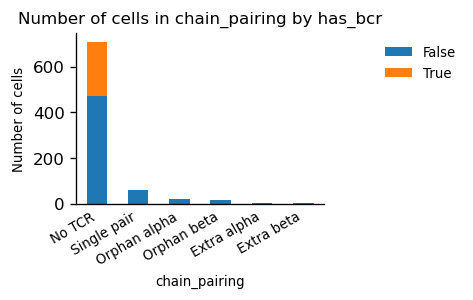

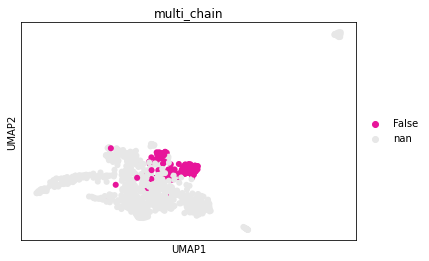

In [12]:
ir.tl.chain_pairing(adata)
# checking if the BCR and TCR overlap
ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="has_bcr")
sc.pl.umap(adata, color="multi_chain", palette = ['#E7159A', '#E7E7E7'])

Well that's a good sign!

So it looks like only ~1% of cells have one pair of productive T-cell receptors after *dandelion's* reannotation. It could be the nature of this particular sample or maybe dandelion converted a lot of sequences to be non-productive. Probably worth running without reannotation with *dandelion* and see how it looks.

In [13]:
print("Fraction of cells with more than one pair of TCRs: {:.2f}".format(np.sum(adata.obs["chain_pairing"].isin(["Extra beta", "Extra alpha", "Two full chains"])) / adata.n_obs))

Fraction of cells with more than one pair of TCRs: 0.01


#### Define clonotypes

... storing 'clonotype' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a8ea190>],
      dtype=object)

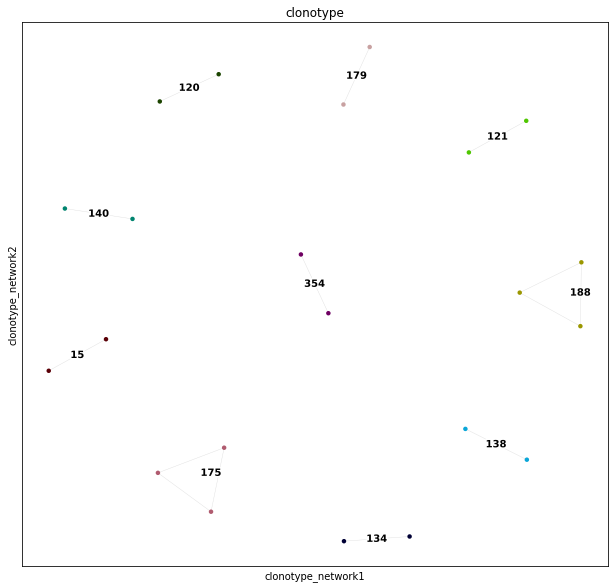

In [14]:
ir.pp.tcr_neighbors(adata, receptor_arms="all", dual_tcr="primary_only", cutoff=0)
ir.tl.define_clonotypes(adata)
ir.tl.clonotype_network(adata, min_size=2)
ir.pl.clonotype_network(adata, color="clonotype", legend_fontoutline=3, size=80)

#### Compute CDR3 neighborhood graph

In [15]:
ir.pp.tcr_neighbors(adata, cutoff=10, receptor_arms="all", dual_tcr="all")
ir.tl.define_clonotypes(adata, partitions="connected")
ir.tl.clonotype_network(adata, min_size=2)

100%|██████████| 69/69 [00:00<00:00, 26185.94it/s]


#### Extracting information (e.g. CDR3-sequences) from a specific clonotype 

In [16]:
adata.obs.loc[adata.obs["clonotype"] == "175", ["TRA_1_cdr3", "TRA_2_cdr3", "TRB_1_cdr3", "TRB_2_cdr3"]]

,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3
Pan_T7917815_CAAGATCTCGTCCAGG,CAVYGQNFVF,None,CASSERGGPGNEQYF,None
Pan_T7917815_CTGATCCCACAGCCCA,CAVYGQNFVF,None,CASSERGGPGNEQYF,None
Pan_T7917815_GACGGCTAGAGTGAGA,CAVYGQNFVF,None,CASSERGGPGNEQYF,None


#### Clonotype analysis

... storing 'clonotype' as categorical
... storing 'clonal_expansion' as categorical


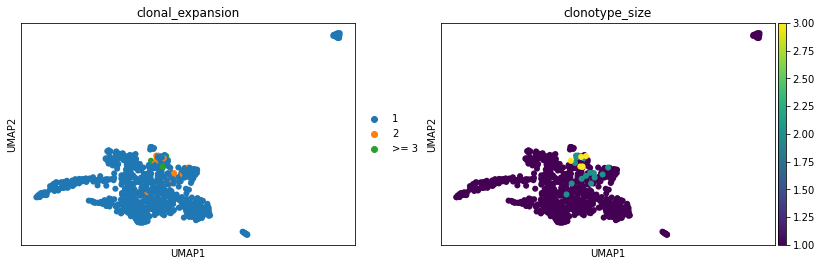

In [17]:
ir.tl.clonal_expansion(adata)
sc.pl.umap(adata, color=["clonal_expansion", "clonotype_size"])

#### Show the number of cells belonging to an expanded clonotype per category 

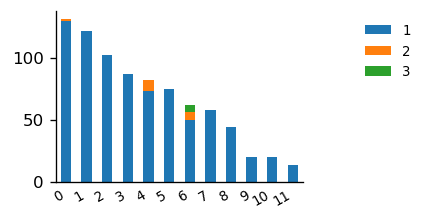

In [18]:
ir.pl.clonal_expansion(adata, groupby="leiden", clip_at=4, normalize=False)

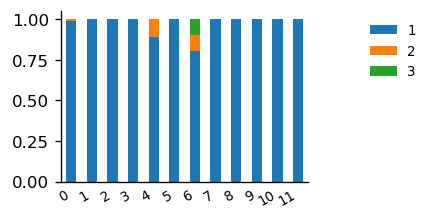

In [19]:
ir.pl.clonal_expansion(adata, groupby="leiden", clip_at=4, normalize=True)

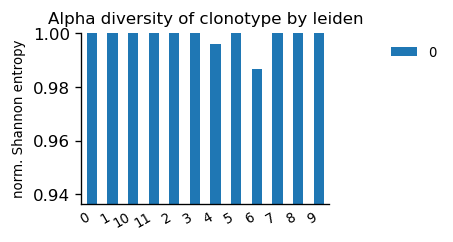

In [20]:
ax = ir.pl.alpha_diversity(adata, groupby="leiden")

#### Gene usage

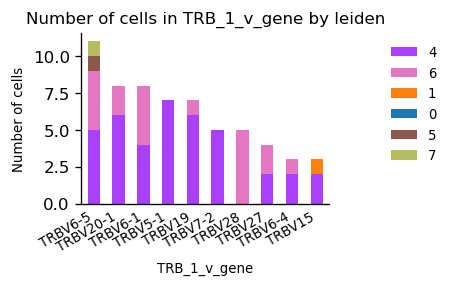

In [21]:
ir.pl.group_abundance(adata, groupby="TRB_1_v_gene", target_col="leiden", max_cols=10, legend = 'none')

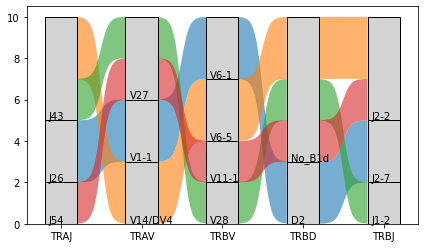

In [22]:
ir.pl.vdj_usage(adata[adata.obs["clonotype"].isin(["175", "15", "140", "188"]), :], top_n=None)

#### Spectratype plots

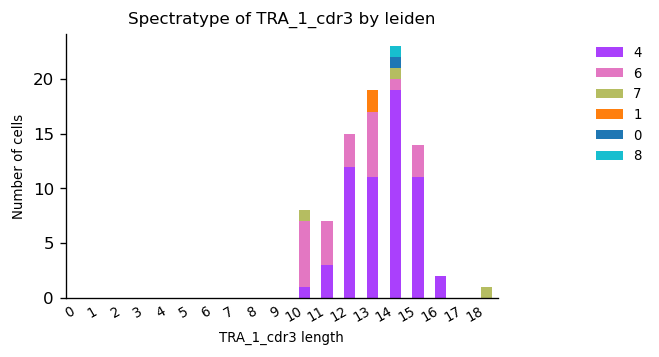

In [23]:
ir.pl.spectratype(adata, target_col="leiden", viztype="bar", fig_kws={"dpi": 120})

For more in depth tutorial and other functions, please go to [scirpy](https://icbi-lab.github.io/scirpy/)'s website.
                                                              
I hope this has been helpful. Let me know if there's any issues.